# Лабораторная работа 3

## Сингулярное разложение и его приложения

Напомним, что сингулярным разложением (SVD, Singular value decomposition) матрицы $A$ размера $m\times n$ называется представление

$$A = U\Sigma V^T,$$

где $U$ — ортогональная матрица размера $m\times m$, $V$ — ортогональная матрица размера $n\times n$, $\Sigma = \mathrm{diag}(\sigma_1,\sigma_2,\sigma_3,\ldots)$ — диагональная матрица размера $m\times n$, в которой $\sigma_1\geqslant\sigma_2\geqslant\ldots\geqslant0$.

На самом деле требование, чтобы матрицы $U$ и $V$ были квадратными, избыточно. *Усечённым сингулярным разложением* мы будем называть разложение

$$A = U\Sigma V^T,$$

где $U$ и $V$ — матрицы с ортонормированными столбцами размеров $m\times k$ и $n \times k$ соответственно, $\Sigma$ — диагональная матрица размера $k\times k$, где $k = \min(m,n)$. Далее мы будем работать исключительно с усечённым разложением.

### Сжатие данных с помощью SVD = построение низкорангового приближения

Введём *норму Фробениуса* матрицы как

$$||A||_{frob} = \sqrt{\mathrm{tr}{A^TA}} = \sqrt{\sum\limits_{i,j}a^2_{i,j}}$$

Иными словами, это обычное евклидово расстояние на пространстве, которое получается, если все матрицы вытянуть в длинные векторы.

Зададимся вопросом: как найти матрицу $A_{r}$ ранга $r$, наименее отличающуюся от $A$ по норме Фробениуса (то есть для которой норма разности $||A - A_{r}||_{frob}$ минимальна). Оказывается, это можно сделать с помощью сингулярного разложения:

**Теорема.** Пусть $\Sigma_{r}$ — это матрица, полученная из $\Sigma$ заменой диагональных элементов $\sigma_{i}$ ($i > r$) нулями, тогда $A_{r} = U\Sigma_{r}V^T$.

Это можно переписать и в более экономичном виде. Если

$$A = \underbrace{
\begin{pmatrix}
u_{11} & \ldots & u_{1k}\\
\vdots & & \vdots\\
u_{m1} & \ldots & u_{mk}
\end{pmatrix}}_{=U}\cdot\underbrace{{
\begin{pmatrix}
\sigma_{1} & &\\
 & \sigma_{2} & \\
 & & \ddots
\end{pmatrix}}
}_{=\Sigma}\cdot \underbrace{
\begin{pmatrix}
v_{11} & \ldots & v_{n1}\\
\vdots & & \vdots\\
v_{1k} & \ldots & v_{nk}
\end{pmatrix}}_{=V^T}$$

то

$$A_{r} = \underbrace{
\begin{pmatrix}
u_{11} & \ldots & u_{1r}\\
\vdots & & \vdots\\
u_{m1} & \ldots & u_{mr}
\end{pmatrix}}_{=U_r}\cdot\underbrace{{
\begin{pmatrix}
\sigma_{1} & &\\
 & \ddots & \\
 & & \sigma_{r}
\end{pmatrix}}
}_{=\Sigma_r}\cdot \underbrace{
\begin{pmatrix}
v_{11} & \ldots & v_{n1}\\
\vdots & & \vdots\\
v_{1r} & \ldots & v_{nr}
\end{pmatrix}}_{=V^T_r}$$

При этом

$$||A - A_{r}||_{frob} = \sqrt{\sum\limits_{i\geqslant r+1} \sigma_{i}^2}$$

Если сингулярные значения матрицы падают достаточно быстро (а в реальных задачах часто бывает именно так), то норма разности будет малой при сравнительно небольшом значении $r$.

На хранение исходной матрицы нам требовалось $m\times n$ памяти. Теперь же, если мы будем хранить отдельно $U_r$, $V_r$ и диагональные элементы $\Sigma_r$, затраты памяти составят $mr + nr + r = r(m + n + 1)$.

**Разложение на компоненты ранга 1**

Обозначим через $u_1,\ldots, u_k$ столбцы матрицы $U$, а через $v_1, \ldots, v_k$ столбцы матрицы $V$. Тогда имеет место равенство

$$A = u_1\sigma_{1}v_1^T + u_2\sigma_{2}v_2^T + u_3\sigma_{3}v_3^T + \ldots$$

Матрицу $u_k\sigma_{k}v_k^T = \sigma_{k}u_kv_k^T$ мы будем называть $k$-й компонентой ранга 1 матрицы $A$. Отметим, что слагаемые в этой сумме ортогональны относительно скалярного произведения $(X, Y) = \mathrm{tr}(X^TY)$ (порождающего норму Фробениуса).

Как нетрудно заметить,

$$A_{r} = \sigma_{1}u_1v_1^T + \sigma_{2}u_2v_2^T + \ldots + \sigma_{r}u_rv_r^T$$

**Технические детали (SVD в Питоне)**

Есть несколько способов сделать в Питоне сингулярное разложение; мы пока предлагаем Вам использовать

`import scipy.linalg as sla`

`U, S, Vt = sla.svd(X, full_matrices=False)`

Для ознакомления с особенностями этой функции рекомендуем обратиться к [документации](https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.svd.html) (в частности, обратите внимание на то, какие именно объекты она возвращает).

### Правила оформления графиков

При работе с данными часто неудобно делать какие-то выводы, если смотреть на таблицу и числа в частности, поэтому важно уметь визуализировать данные. 

У matplotlib, конечно же, есть [документация](https://matplotlib.org/users/index.html) с большим количеством [примеров](https://matplotlib.org/examples/), но для начала достаточно знать про несколько основных типов графиков:
- plot — обычный поточечный график, которым можно изображать кривые или отдельные точки;
- hist — гистограмма, показывающая распределение некоторой величины;
- scatter — график, показывающий взаимосвязь двух величин;
- bar — столбцовый график, показывающий взаимосвязь количественной величины от категориальной.

Ещё одна билиотека для визуализации: [seaborn](https://jakevdp.github.io/PythonDataScienceHandbook/04.14-visualization-with-seaborn.html). Это настройка над matplotlib, иногда удобнее и красивее делать визуализации через неё. 

Не забывайте про базовые принципы построения приличных графиков:
- оси должны быть подписаны, причём не слишком мелко;
- у графика должно быть название;
- если изображено несколько графиков, то необходима поясняющая легенда;
- для точек из разных выборок, необходимо использовать разные цвета;
- все линии на графиках должны быть чётко видны (нет похожих цветов или цветов, сливающихся с фоном);
- размер графика должен быть таким, чтобы по нему несложно было сделать необходимые выводы о данных;
- если отображена величина, имеющая очевидный диапазон значений (например, проценты могут быть от 0 до 100), то желательно масштабировать ось на весь диапазон значений (исключением является случай, когда вам необходимо показать малое отличие, которое незаметно в таких масштабах).

Помните, что проверяющий имеет право снизить оценку за неопрятные графики.

### Оценивание

Обратите внимание, что в каждом разделе есть задания на написания кода и есть вопросы. Вопросы дополняют задачи и направлены на то, чтобы проинтерпретировать или обосновать происходящее. Код без интерпретации не имеет смысла, поэтому отвечать на вопросы обязательно — за отсутствие ответов мы будем снижать баллы за задачи. Если Вы ответите на вопросы, но не напишете корректный код к соответствующим оцениваемым задачам, то в подавляющем большинстве случаев баллы за такое выставлены не будут.

### Формат сдачи
Задания сдаются через систему Anytask. Инвайт можно найти на странице курса. Присылать необходимо ноутбук с выполненным заданием. Сам ноутбук называйте в формате homework-practice-03-linregr-Username.ipynb, где Username — Ваша фамилия.

### Задание 1. Сжатие данных с помощью SVD

Загрузите выложенную на странице курса фотографию.

In [2]:
import numpy as np
from skimage.io import imread

img = imread(r'/content/chain_small.jpg')
img = img.mean(axis=2) # это матрица из интенсивностей серого цвета; её уже можно подвергать SVD

Нарисуйте картинку:

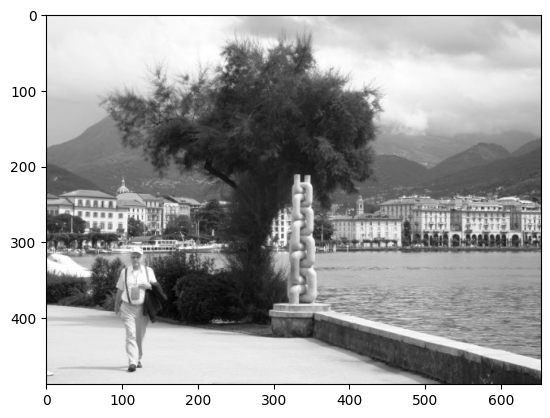

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

imgplot = plt.imshow(img, cmap='gray')

Постройте сингулярное разложение этой матрицы.

In [4]:
from numpy.linalg import svd

U, S, VT = svd(img, full_matrices=False)

**1. [0.1 балла]** Нарисуйте график диагональных элементов матрицы $\Sigma$:

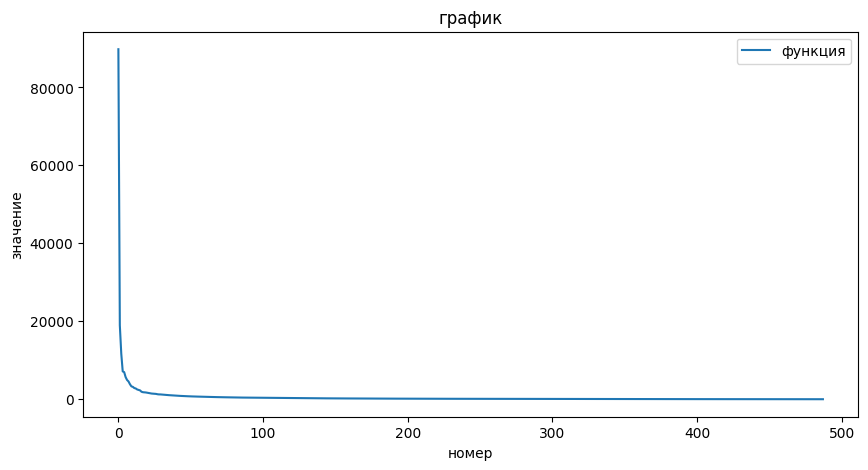

In [6]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
plt.figure(figsize=(10, 5));
plt.plot(S, label = "функция")
plt.xlabel('номер')
plt.ylabel('значение')
plt.title('график')
plt.legend();

Кажется, что они убывают достаточно быстро и есть надежда, что первые несколько компонент дадут картинку, близкую к исходной.

**Важно:** при визуализации различных компонент в этом задании используйте только матричные операции. В частности, избегайте циклов, функций `map` и `reduce`, а также специальных функций, находящих суммы компонент.

**2. [0.1 балла]** Визуализуйте первую компоненту ранга 1. Ожидали ли Вы увидеть именно это? Поясните.

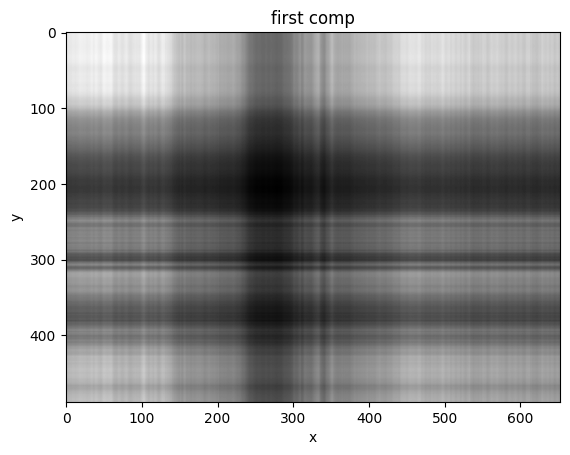

In [7]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
def plot_comps(rank1, rank2, label):
    comp = U[:, rank1:rank2] @ np.diag(S[rank1:rank2]) @ VT[rank1:rank2, :]
    imgplot = plt.imshow(comp, cmap='gray') 
    plt.ylabel('y')
    plt.xlabel('x')
    plt.title(label)
plot_comps(0, 1, "first comp")

  Так как компоненты расположены в порядке убывания, они расположены так же и в порядке убывания влияния на итоговую картинку, то есть первая компонента является самой "важной", так что логично, что в целом "пятна" совпадают в исходной картинкой. Однако так как компоненты "линейны", получаем, что одна такая создаёт рисунок только из линий разных цветов и всего двух направленностей. Наложение множества таких компонент приближает нас к исходному изображению, однако одна, хоть и самая важная, компонента, даёт нам лишь некоторые основные пятна.

**3. [0.5 балла]** Визуализуйте суммы компонент ранга 1 с первой по двадцатую, с первой по пятидесятую, с двадцатой по сотую, с двадцатой по последнюю. Сделайте выводы.

Text(0.5, 1.0, 'Сумма компонент ранга 1 с 1 по 20')

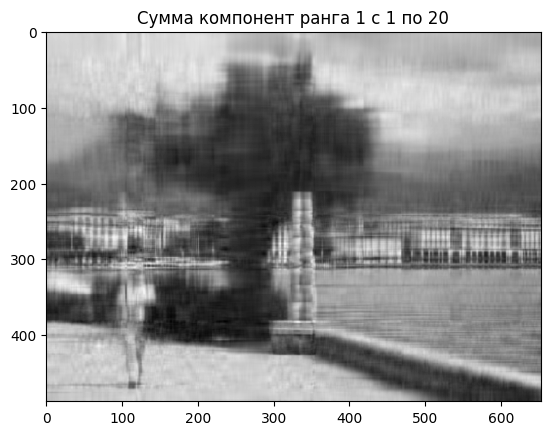

In [8]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
c_1_to20 = np.dot(np.dot(U[:, :20], np.diag(S[:20])), VT[:20, :])
imgplot = plt.imshow(c_1_to20, cmap = 'gray')
plt.title('Сумма компонент ранга 1 с 1 по 20')

Text(0.5, 1.0, 'Сумма компонент ранга 1 с 1 по 50')

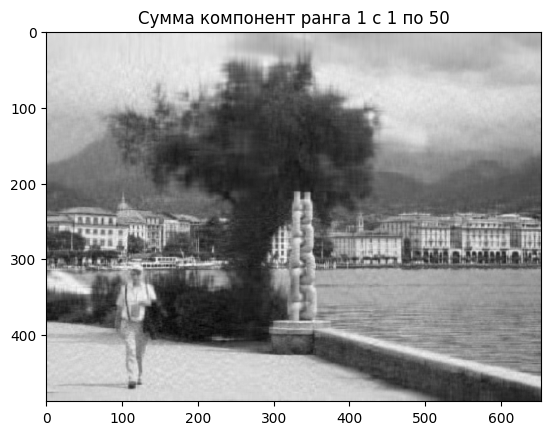

In [9]:
c_1_to50 = np.dot(np.dot(U[:, :50], np.diag(S[:50])), VT[:50, :])
imgplot = plt.imshow(c_1_to50, cmap = 'gray')
plt.title('Сумма компонент ранга 1 с 1 по 50')

Text(0.5, 1.0, 'Сумма компонент ранга 1 с 20 по 100')

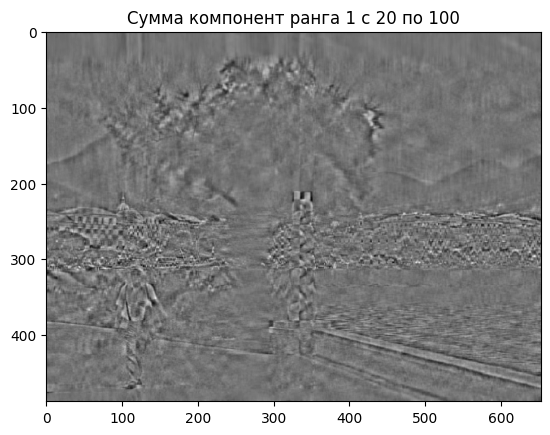

In [10]:
c_20_to100 = np.dot(np.dot(U[:, 20:100], np.diag(S[20:100])), VT[20:100, :])
imgplot = plt.imshow(c_20_to100, cmap = 'gray')
plt.title('Сумма компонент ранга 1 с 20 по 100')

Text(0.5, 1.0, 'Сумма компонент ранга 1 с 20 по последнюю')

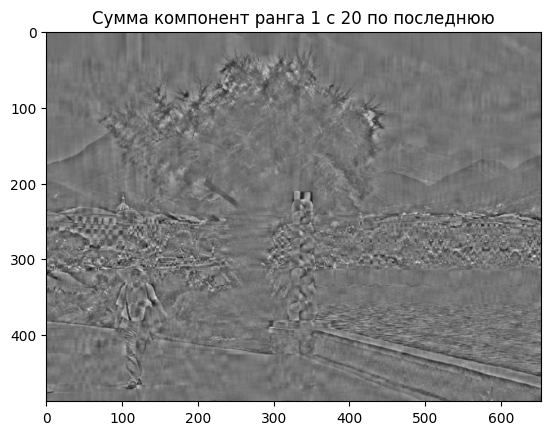

In [12]:
c_20_tolast = np.dot(np.dot(U[:, 20:], np.diag(S[20:])), VT[20:, :])
imgplot = plt.imshow(c_20_tolast, cmap = 'gray')
plt.title('Сумма компонент ранга 1 с 20 по последнюю')

Да, все картинки объясняются предположением, высказанном в предыдущем номере. Главный "вклад" в картинку вносят первые двадцать компонент, далее идут компоненты, которые делают эту картинку четче

**4. [0.35 балла]** Как Вам кажется, какие компоненты нужно взять для достаточно хорошего восстановления исходного изображения? Аргументируйте свой ответ. Не забудьте визуализировать сумму выбранных компонент.

*Комментарий: для получения полного балла за это задания постарайтесь привести более убедительный аргумент, нежели Ваши субъективные впечатления от сравнения полученного изображения с исходным.*

из первых нескольких пунктов этого задания понятно, что первые n(n < примерно 20) компонент отвечают за исходную картинку. то есть без них все будет совсем плохо + ничего не будет видно и просто будет серая картинка. последующие компоненты отвечают за резкость картинки. тогда теперь построим график зависимости номера компоненты и его значения. из этого графика можно сделать вывод, после какого номера компонента на нашу картинку уже не будет так сильно влиять. нарисуем график.

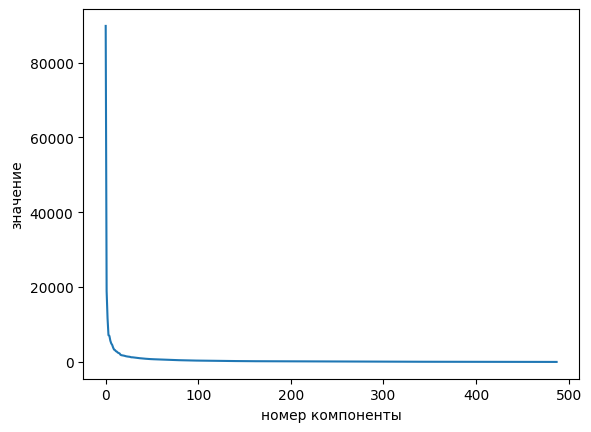

In [14]:
#╰( ͡° ͜ʖ ͡° )つ──☆*plt.axis([20, 200, 0, 3000])
plt.ylabel('значение')
plt.xlabel('номер компоненты')
plt.plot(S)

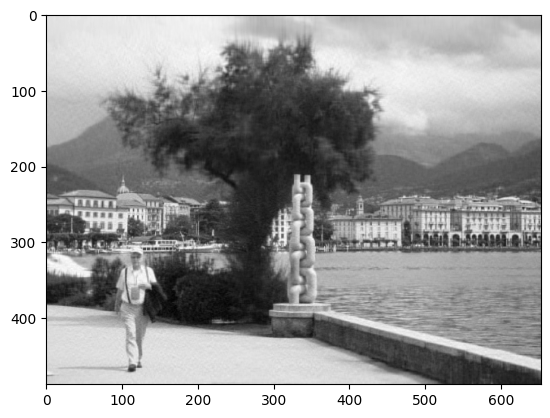

In [16]:
#можем заметить, что после примерно сотого значения значение уже слабо меняется
#и вообще становится довольно малым => ста сигм хватит, чтобы можно было достичь хорошей картинки
new = np.dot(np.dot(U[:, :100], np.diag(S[:100])), VT[:100, :])
imgplot = plt.imshow(new, cmap = 'gray')


**5. [0.15 балла]** Во сколько раз меньше памяти (теоретически) потребуется для хранения нового изображения по сравнению с исходным?

╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ 
Так как img.shape[0] = 488, img.shape[1] = 653, то
$$\frac{\text{память занимало}}{\text{память занимает}} = \frac{n \cdot m}{r(n + m + 1)} = \frac{488 \cdot 653}{100(488+653+1)} = \frac{159332}{42825}
\approx 2.7 \approx 3$$
Ответ: примерно в 3 раза

**6. [0.25 балла]** Подсчитайте, сколько в действительности места в памяти компьютера занимают исходная матрица и компоненты её сингулярного разложения. Согласуется ли этот результат с ответом предыдущего пункта? Сделайте выводы.

╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ Расчеты приведены ниже. Да, все согласовывается

In [17]:
newU, newS, newVT = U[:, 0:100], S[0:100], VT[0:100, :];
print('Исходник', img.nbytes, 'единиц');
print('Новое:', newU.nbytes + newS.nbytes + newVT.nbytes, 'единиц');

Исходник 2549312 единиц
Новое: 913600 единиц


In [18]:
newU, newS, newVT = U[:, 0:100], S[0:100], VT[0:100, :];
print(img.nbytes / (newU.nbytes + newS.nbytes + newVT.nbytes))

2.790402802101576


### Задание 2. Геометрия SVD. Визуализация данных с помощью SVD

**Геометрический смысл SVD**

Допустим, что у нас есть выборка $x_1,\ldots,x_m\in\mathbb{R}^n$. Запишем её в матрицу объекты-признаки

$$X = \begin{pmatrix}
x_{11} & \ldots & x_{1n}\\
\vdots & & \vdots\\
x_{m1} & \ldots & x_{mn}
\end{pmatrix}$$

(строки — объекты, столбцы — признаки) и сделаем SVD-разложение: $X = U\Sigma V^T$. Его можно интерпретировать следующим образом:

$$X = U\Sigma\cdot V^T,$$

где $U\Sigma$ — это матрица объекты-признаки для тех же объектов, но в новых признаках, полученных из исходных с помощью линейного преобразования $V$ (напоминаем, что умножение на матрицу справа соответствует преобразованию столбцов). Попробуем понять, чем замечательны эти признаки.

Рассмотрим матрицу $X^TX = V\Sigma^2V^T$. Легко видеть, что это матрица Грама системы столбцов матрицы $X$; иными словами, в ней записаны скалярные произведения векторов различных признаков. Из лекций вы знаете, что $\sigma_1^2$, квадрат первого сингулярного числа, это наибольшее собственное значение матрицы $X^TX$, а $v_1$, первый столбец матрицы $V$, — это соответствующий собственный вектор. Можно показать, что

$$\sigma_1 = \mathrm{max}_{w}\frac{|Xw|}{|w|} = \mathrm{max}_{|w| = 1}\left(|Xw|\right).$$

Попробуем осознать физический смысл этой штуки. Напомним, что строки матрицы $X$ — это координаты объектов $x_1,\ldots,x_m$ в пространстве признаков. Произведение $Xw$ — это вектор из значений на тех же самых объектах некоторого нового признака, являющегося линейной комбинацией исходных с коэффициентами $w_1,\ldots,w_n$:

$$Xw = w_1\begin{pmatrix} x_{11}\\ \ldots \\ x_{m1}
\end{pmatrix} + w_2\begin{pmatrix} x_{12}\\ \ldots \\ x_{m2}
\end{pmatrix} + \ldots + w_n\begin{pmatrix} x_{1n}\\ \ldots \\ x_{mn}
\end{pmatrix}$$

Соответственно, $|Xw|^2$ — это квадрат длины вектора, составленного из значений нового признака.

Таким образом, первому сингулярному значению $\sigma_1$ отвечает такой признак, у которого сумма квадратов значений максимальна, то есть признак, принимающий, условно говоря, самые большие значения.

Резюмируя, мы можем сказать, что сингулярное разложение делает следующее:
- находит новый признак (новое направление) вдоль которого "дисперсия"$^1$ максимальна;
- в ортогональной ему плоскости находит признак, вдоль которого "дисперсия" максимальна;
- и так далее.

---
$^1$ настоящая выборочная дисперсия с точностью до числового множителя была бы равна $|Xw - \overline{Xw}|^2$, где $\overline{Xw} = \frac1m\sum_{i=1}^m(Xw)_i$ — среднее значения признака.

**1. [1.25 балла]** Пусть $\sigma_1$ — старшее сингулярное число матрицы $X$ размера $m \times n$. Покажите, что верна цепочка равенств
$$\sigma_1 = \mathrm{max}_{w}\frac{|Xw|}{|w|} = \mathrm{max}_{|w| = 1}~|Xw| = \mathrm{max}_{|u|=|v| = 1}~|u^T Xv|.$$

**Подсказки:**
* при доказательстве равенства $\sigma_1 = \mathrm{max}_{w}\frac{|Xw|}{|w|}$ выразите вектор $w$ как $\alpha\cdot v$, где $|v|=1$, и рассмотрите описанное выражение
* при доказательстве равенства $\sigma_1 = \mathrm{max}_{|w| = 1}~|Xw|$ представьте $w$ в виде линейной комбинации ортонормированного базиса, состоящего из собственных векторов оператора $X^TX$, и внимательно посмотрите на произведение $wX^TXw$
* при доказательстве равенства $\sigma_1 = \mathrm{max}_{|u|=|v| = 1}~|u^T Xv|$ разложите матрицу $X$ в SVD-разложение, а векторы $u$ и $w$ представьте в виде линейной комбинации векторов, являющихся столбцами матриц $U$ и $V$.

╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ


---
Рассмотрим матрицу $X^{T}X$ - это симметричная матрица $\Rightarrow$ если взять ее за матрицу самосопряженного лин. оператора, то $\exists$ ортон. базис из собственных векторов ${v_1 \dots v_n}$ и $X^{T}X = diag(\sigma_{1}^{2} \dots \sigma_{n}^{2}) $ 

Представим $w$ как : $w = a_1v_1 + \dots + a_n v_n,$ тогда: $ |w| = a_1^2 + \dots + a_n^2$

Рассмотрим $X^{T}Xw$:

$$X^{T}Xw = diag(\sigma_{1}^{2} \dots \sigma_{n}^{2})(a_1v_1 + \dots + a_n v_n) = 
\sigma_{1}^{2}a_1v_1+ \dots + \sigma_{n}^{2}a_n v_n$$

Теперь про $|Xw|$:

$$|Xw|^2 = (Xw)^{T}(Xw) = w^T X^T Xw = w^T (\sigma_{1}^{2}a_1v_1+ \dots + \sigma_{n}^{2}a_n v_n) = 
\sigma_{1}^{2}a_1+ \dots + \sigma_{n}^{2}a_n $$ (тк базис - ортонормированный)

Получаем:

$$|Xw|^2 \leqslant \sigma_1^2(a_1^2 + \dots + a_n^2) = \sigma_1^2 |w|$$ 
$$(\sigma_1^2 max \space с.з.)$$

$$\frac{|Xw|^2}{|w|^2} \leqslant \sigma_1^2 \Leftrightarrow \frac{|Xw|}{|w|} \leqslant \sigma_1$$

Если $w$ - с.в. для $\sigma_1$, то : $|Xw| = \sigma_1 |w|$

В итоге : $\sigma_1 = \mathrm{max}_{w}\frac{|Xw|}{|w|} = \mathrm{max}_{|w| = 1}~|Xw|$

Про последнее равенство:

$$|u^TXv|^2 = (u^TXv)^T u^TXv = v^T X^T u u^T X v =(т.к. |u| = 1) v^T X^T X v = |Xv|^T 
\Rightarrow(по \space 1 \space части)\space \sigma_1 =  \mathrm{max}_{|u|=|v| = 1}~|u^T Xv|$$

---

**2. [0.75 балла]** Рассмотрим матрицу $A = (a_{ij})$ размера $n \times n$, такую что $a_{ij} = \sin i \cdot \cos j$, причём нумерация ведётся с нуля. Найдите $r = \text{rk}A$ (можете считать, что $n > 1$), а также разложение (Compact SVD) $A=U \Sigma V^T$, где $U$ и $V$ — матрицы с ортонормированными столбцами размера $n\times r$, а $\Sigma = \mathrm{diag}(\sigma_1,\ldots,\sigma_r)$ — диагональная матрица размера $r\times r$, в которой $\sigma_1\geqslant\ldots\geqslant\sigma_r > 0$. 

╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
Если рассматривать данную матрицу А, то будет получаться, что каждый элемент первой строки будет равен 0, так как cos(j) $\forall j\in[1,\ldots,n]$ будем умножаться на sin(0) = 0 => первая строка нулевая. Если рассматриваем следующие строки матрицы А, то можем утверждать, что они будут линейно зависимыми. Доказательство: $a_{(k)}=a_{(z)}\cdot \frac{sin(k-1)}{sin(z-1)} \forall z\in[2,\ldots,n], k\in[1,\ldots,n]$. Доказали, победа. Теперь, знаем, что у нас есть одна нулевая строка и (n-1) пропорциональных => строки линейно зависимы => rkA = 1.

Теперь приступим к разложению А в виде $U\cdot \Sigma \cdot V^T$. Заметим, что
$U = \begin{pmatrix} sin(0)\\ sin(1) \\ sin(2)\\ \ldots \\ sin(n-1)\end{pmatrix}, V = \begin{pmatrix} cos(0)\\ cos(1) \\ cos(2)\\ \ldots \\ cos(n-1)\end{pmatrix}$, то у нас это все собирается в достаточно легкий вид, где $u\cdot v^T = \begin{pmatrix} sin(0)\\ sin(1) \\ sin(2)\\ \ldots \\ sin(n-1)\end{pmatrix} \cdot \begin{pmatrix} cos(0) & cos(1) & cos(2)& \ldots & cos(n-1)\end{pmatrix} = A$ (это следует из условия)

Следующий очень важный переход: мы ранее доказали, что rkA = 1 => $\text{rk}\Sigma = 1$ => матрица сигм диагональная(это следует из условия) => r = 1(так как изначально $\Sigma$ была размерности rxr из условия задачи

Следующий этап: нам нужно найти $\sigma_1$, а потом ортонормировать u and v. Как мы делаем:
$|u|=\sqrt{\sum_{i=0}^{n-1}sin(i)^2}=S_u, |v|=\sqrt{\sum_{i=0}^{n-1}cos(i)^2}=S_v$.
Пусть $U=\frac{u}{S_u}, V=\frac{v}{S_v}$, $|U|=|V|=1$, тогда U,V-матрицы с ортогональными столбцами, размера $n\times 1$, так как r = 1.

Тогда можем сделать вывод, что $\Sigma = \begin{pmatrix}\sigma_1\end{pmatrix} = \begin{pmatrix}S_u\cdot S_v\end{pmatrix}$

Тогда, $U\cdot \Sigma \cdot V^T = \begin{pmatrix} \frac{sin(0)}{S_u} \\ \frac{sin(1)}{S_u} \\ \frac{sin(2)}{S_u}\\ \ldots \\ \frac{sin(n-1)}{S_u}\end{pmatrix} \cdot \begin{pmatrix}\ S_u\cdot S_v\end{pmatrix} \cdot \begin{pmatrix} \frac{cos(0)}{S_v} & \frac{cos(1)}{S_v} & \frac{cos(2)}{S_v}& \ldots & \frac{cos(n-1)}{S_v}\end{pmatrix}= А$

Теперь можем утверждать, что rkA = r = 1. и для матрицы А у нас разложение на U, V(это матрицы с ортогональными столбцами размеров nx1 and 1xn соответственно), $\Sigma$ ровно такое, как показано выше.

**3. [0.5 балла]** Рассмотрим полное сингулярное разложение $A = U \Sigma V^T$ для матрицы размера $m \times n$, такой что $\text{rk}A=r$. Определим также линейное отображение $\mathcal{A} \colon \mathbb{R}^n \to \mathbb{R}^m$, которое действует умножением на матрицу $A$. Покажите, что $\text{Im}\mathcal{A} = \langle u_1, \ldots, u_r \rangle$, а $\text{Ker}\mathcal{A} = \langle v_{r+1}, \ldots, v_n \rangle$.

╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

Про $\text{Ker}\mathcal{A}$ :

$$A = U \Sigma V^T$$
$$A = U \Sigma V^T | * V$$
$$AV = U \Sigma \space (тк \space V - ортог. матрица)$$
$$\text{rk}A=r \Rightarrow \Sigma = diag(\sigma_1 , \sigma_2 \dots \sigma_r 0 \dots 0)$$
$$AV = (U_1 \sigma_1 \dots U_r \sigma_r \space 0 \dots 0) $$
Получили, что образы  $v_{r+1} \dots v_n = 0 \Rightarrow \text{Ker}\mathcal{A} = 
\langle v_{r+1}, \ldots, v_n \rangle$

Про $\text{Im}\mathcal{A}$:

тк $\text{Ker}\mathcal{A} = \langle v_{r+1}, \ldots, v_n \rangle$, то образы $v_1 \dots v_n$ - базис $\text{Im}\mathcal{A}$

Из SVD знаем как получаются $u_i$ : $u_i = \frac{1}{\sigma_i} Av_i$ те $u_i$ это $v_i * \text{Const} \Rightarrow 
\text{Im}\mathcal{A} = \langle u_1, \ldots, u_r \rangle$

**4. [0.75 балла]** Рассмотрим матрицу $A$ размера $m \times n$, такую что $m \geqslant n$ и столбцы $A$ линейно независимы. Найдите матрицу $\Sigma$ из полного сингулярного разложения для матрицы $P = A(A^T A)^{-1} A^T$.

╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

пусть полное SVD для матрицы $A$ $UBV^T$, а ее сингулярные значения - $\beta_1, .., \beta_n$, при этом, $U, V$ - ортогональные (и как следствие обратимые) матрицы. $n = rkA = rkB \in M_{n}(F) \Rightarrow существует (B^TB)^{-1}$  

$A(A^T A)^{-1} A^T = UBV^T((UBV^T)^T(UBV^T))^{-1}(UBV^T)^T = 
UBV^T((VB^TU^T)(UBV^T))^{-1}VB^TU^T = 
UBV^T(V(B^TB)V^T)^{-1}VB^TU^T = 
UBV^T((V^T)^{-1}(B^TB)^{-1}V^{-1})VB^TU^T = 
UBV^TV(B^TB)^{-1}V^TVB^TU^T = 
UB(B^TB)^{-1}B^TU^T$

Вспомним, что по условию $m \geqslant n$

$$B(B^TB)^{-1}B^T = \begin{pmatrix}
\beta_1 & 0 & 0 & ... & 0 \\
0 & \beta_2 & 0 & ... & 0 \\
0 & 0 & \beta_3 & ... & 0 \\
\vdots & \vdots & \vdots & \ddots & \vdots \\
0 & 0 & 0 & ... & \beta_n \\
0 & 0 & 0 & ... & 0 \\ 
\vdots & \vdots & \vdots & \ddots & \vdots \\
0 & 0 & 0 & ... & 0 
\end{pmatrix} \cdot \\ \\ \cdot   \left( 
\begin{pmatrix}
\beta_1 & 0 & 0 & ... & 0 & 0 & ... & 0\\
0 & \beta_2 & 0 & ... & 0 & 0 & ... & 0\\
0 & 0 & \beta_3 & ... & 0  & 0 & ... & 0\\
\vdots & \vdots & \vdots & \ddots & \vdots & \vdots & \ddots & \vdots \\
0 & 0 & 0 & ... & \beta_n & 0 & ... & 0\\
\end{pmatrix}
\begin{pmatrix}
\beta_1 & 0 & 0 & ... & 0 \\
0 & \beta_2 & 0 & ... & 0 \\
0 & 0 & \beta_3 & ... & 0 \\
\vdots & \vdots & \vdots & \ddots & \vdots \\
0 & 0 & 0 & ... & \beta_n \\
0 & 0 & 0 & ... & 0 \\
\vdots & \vdots & \vdots & \ddots & \vdots \\
0 & 0 & 0 & ... & 0 
\end{pmatrix} \right)^{-1} \cdot \\ \\ \cdot 
\begin{pmatrix}
\beta_1 & 0 & 0 & ... & 0 & 0 & ... & 0\\
0 & \beta_2 & 0 & ... & 0 & 0 & ... & 0\\
0 & 0 & \beta_3 & ... & 0  & 0 & ... & 0\\
\vdots & \vdots & \vdots & \ddots & \vdots & \vdots & \ddots & \vdots \\
0 & 0 & 0 & ... & \beta_n & 0 & ... & 0\\
\end{pmatrix} = \\ \\
= 
\begin{pmatrix}
\beta_1 & 0 & 0 & ... & 0 \\
0 & \beta_2 & 0 & ... & 0 \\
0 & 0 & \beta_3 & ... & 0 \\
\vdots & \vdots & \vdots & \ddots & \vdots \\
0 & 0 & 0 & ... & \beta_n \\
0 & 0 & 0 & ... & 0 \\ 
\vdots & \vdots & \vdots & \ddots & \vdots \\
0 & 0 & 0 & ... & 0 
\end{pmatrix} \cdot    \left( 
\begin{pmatrix}
\beta^2_1 & 0 & 0 & ... & 0 \\
0 & \beta^2_2 & 0 & ... & 0 \\
0 & 0 & \beta^2_3 & ... & 0 \\
\vdots & \vdots & \vdots & \ddots & \vdots \\
0 & 0 & 0 & ... & \beta^2_n \\
\end{pmatrix}
 \right)^{-1} \cdot \\ \\ \cdot 
\begin{pmatrix}
\beta_1 & 0 & 0 & ... & 0 & 0 & ... & 0\\
0 & \beta_2 & 0 & ... & 0 & 0 & ... & 0\\
0 & 0 & \beta_3 & ... & 0  & 0 & ... & 0\\
\vdots & \vdots & \vdots & \ddots & \vdots & \vdots & \ddots & \vdots \\
0 & 0 & 0 & ... & \beta_n & 0 & ... & 0\\
\end{pmatrix} 
= \\ \\ = 
\begin{pmatrix}
\beta_1 & 0 & 0 & ... & 0 \\
0 & \beta_2 & 0 & ... & 0 \\
0 & 0 & \beta_3 & ... & 0 \\
\vdots & \vdots & \vdots & \ddots & \vdots \\
0 & 0 & 0 & ... & \beta_n \\
0 & 0 & 0 & ... & 0 \\ 
\vdots & \vdots & \vdots & \ddots & \vdots \\
0 & 0 & 0 & ... & 0 
\end{pmatrix} \cdot 
\begin{pmatrix}
\beta^{-2}_1 & 0 & 0 & ... & 0 \\
0 & \beta^{-2}_2 & 0 & ... & 0 \\
0 & 0 & \beta^{-2}_3 & ... & 0 \\
\vdots & \vdots & \vdots & \ddots & \vdots \\
0 & 0 & 0 & ... & \beta^{-2}_n \\
\end{pmatrix}
 \cdot \\ \\ \cdot 
\begin{pmatrix}
\beta_1 & 0 & 0 & ... & 0 & 0 & ... & 0\\
0 & \beta_2 & 0 & ... & 0 & 0 & ... & 0\\
0 & 0 & \beta_3 & ... & 0  & 0 & ... & 0\\
\vdots & \vdots & \vdots & \ddots & \vdots & \vdots & \ddots & \vdots \\
0 & 0 & 0 & ... & \beta_n & 0 & ... & 0\\
\end{pmatrix} 
= \\ \\ = 
\begin{pmatrix}
1 & 0 & 0 & ... & 0 & 0 & ... & 0 \\
0 & 1 & 0 & ... & 0 & 0 & ... & 0 \\
0 & 0 & 1 & ... & 0 & 0 & ... & 0 \\
\vdots & \vdots & \vdots & \ddots & \vdots & \vdots & \ddots & \vdots  \\
0 & 0 & 0 & ... & 1 & 0 & ... & 0 \\
0 & 0 & 0 & ... & 0 & 0 & ... & 0 \\
\vdots & \vdots & \vdots & \ddots & \vdots & \vdots & \ddots & \vdots  \\
0 & 0 & 0 & ... & 0 & 0 & ... & 0 
\end{pmatrix} = \Sigma$$

Получилась диагональная матрица, элементы на диагонали по неубыванию. Тогда это и будет $\Sigma$

**Визуализация данных с помощью SVD**

Выше мы обсудили, что первые из "новых" признаков — это признаки, значения которых, скажем так, наиболее разнообразны. Зачастую (хотя и не всегда) именно они несут в себе наиболее важные черты датасета. И если взять два-три первых, то датасет можно нарисовать и посмотреть на него — и, возможно, обнаружить какую-то структуру.

С помощью функции `dsklearn.datasets.load_digits()` загрузите датасет рукописных цифр [MNIST](http://yann.lecun.com/exdb/mnist/). В нём есть несколько атрибутов; вам сейчас будут нужны `digits.data` (`np.array`, строки которого — это вытянутые в одну строку значения пикселей) и `digits.target` (в них записаны соответствующие цифры).

0


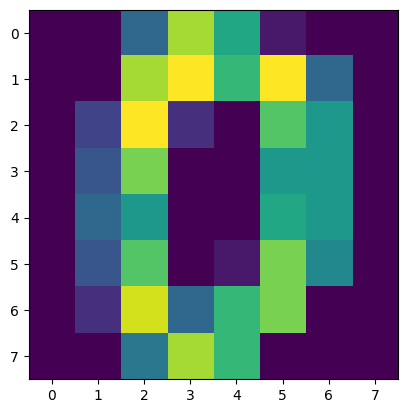

In [19]:
from sklearn import datasets

digits = datasets.load_digits()

print(digits.target[0])

plt.imshow(digits.data[0].reshape((8,8)))

**5. [0.1 балла]** Примените к матрице `digits.data` сингулярное разложение.

In [20]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
U, S, VT = svd(digits.data, full_matrices = False)

**6. [0.65 балла]** Визуализируйте данные, спроецировав их на такую плоскость, чтобы координаты точек соответствовали первым двум новым признакам. Не забудьте покрасить точки, отвечающие различным цифрам, в разные цвета (если Вы любите красивые визуализации, разберитесь, как вместо точек рисовать маленькие цифры).

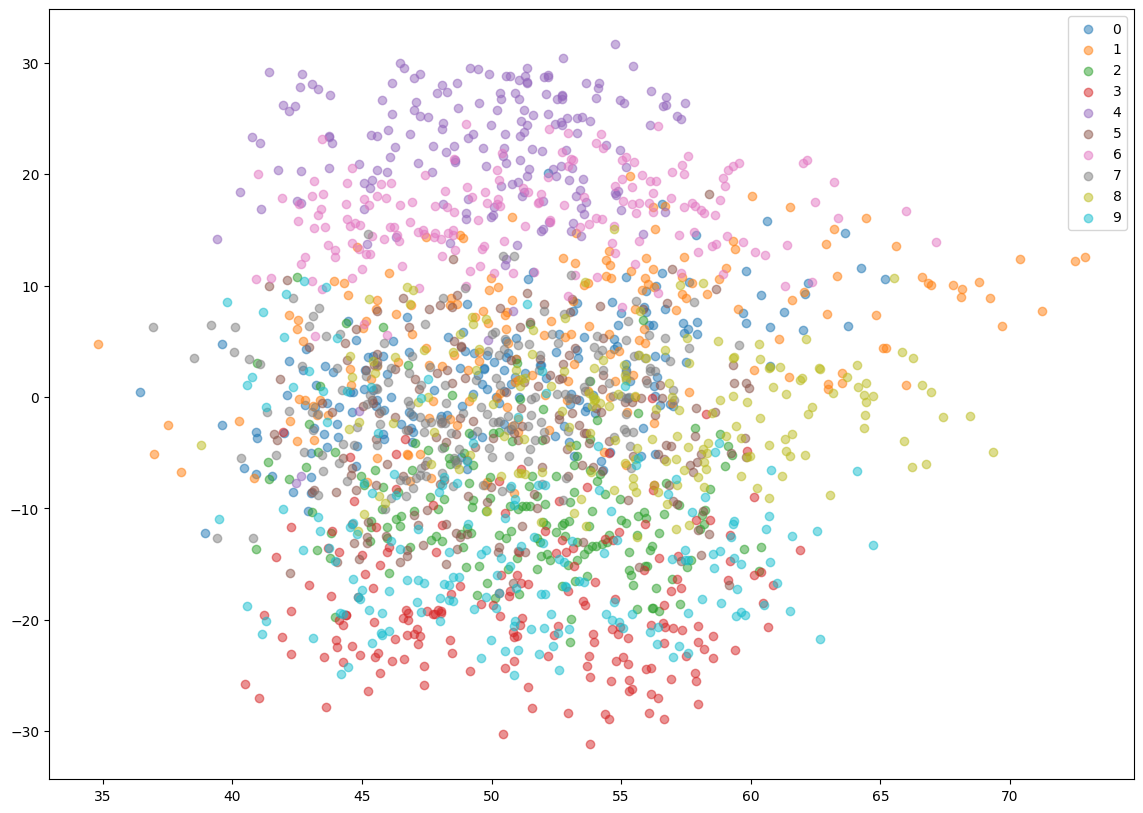

In [21]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
US = np.dot(U, np.diag(S))

X = [[] for i in range(10)]
Y = [[] for i in range(10)]
# X[i][j] - X координата j точки равной цифре i
# Y[i][j] - Y координата j точки равной цифре i
for i in range(US.shape[0]):
    X[digits.target[i]].append(US[i, 0])
    Y[digits.target[i]].append(US[i, 1])


plt.figure(figsize=(14, 10))
for i in range(10):
    plt.scatter(X[i], Y[i], label=str(i), alpha=0.5)
    
plt.legend()

**7. [0.25 балла]** Теперь вычтите из каждого признака его среднее значение, снова сделайте SVD и нарисуйте разноцветные точки.

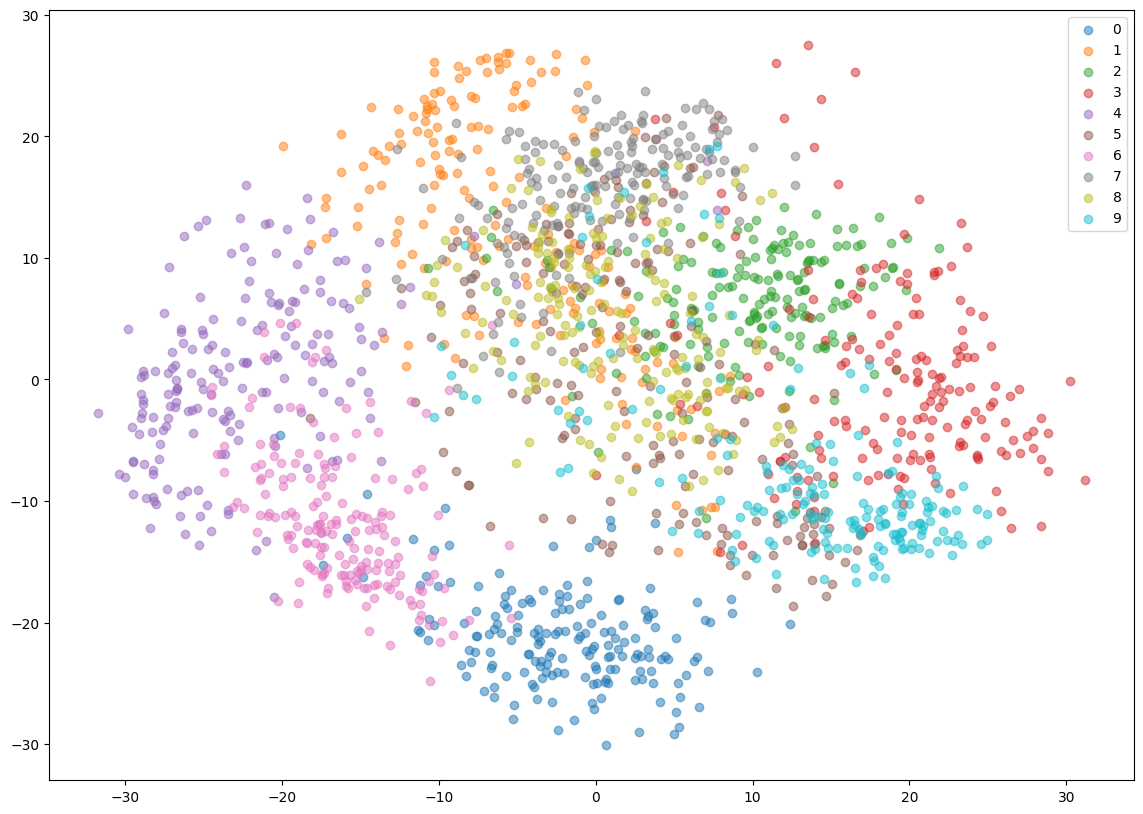

In [22]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
import copy
data = copy.deepcopy(digits.data)
data = data - data.mean(axis=0, keepdims=True)
U, S, VT = svd(data, full_matrices=False)

US = np.dot(U, np.diag(S))

X = [[] for i in range(10)]
Y = [[] for i in range(10)]
# X[i][j] - X координата j точки равной цифре i
# Y[i][j] - Y координата j точки равной цифре i
for i in range(US.shape[0]):
    X[digits.target[i]].append(US[i, 0])
    Y[digits.target[i]].append(US[i, 1])


plt.figure(figsize=(14, 10))
for i in range(10):
    plt.scatter(X[i], Y[i], label=str(i), alpha=0.5)
    
plt.legend()

**8. [0.25 балла]** Сравните выполненные Вами в двух предыдущих пунктах визуализации. Чем последняя выгодно отличается от первой?

╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

На первой картинке все вперемешку, а на второй цифры начали группироваться, в каждой группе собрались похожие друг на друга элементы. К тому же теперь все точки находятся в квадрате 30х30, а раньше 30х70, что являются плюсом при работе с данными и обучении модели

**9. [1 балл]** Сравните работу SVD с другим методом понижения размерности: [случайными гауссовскими проекциями](http://scikit-learn.org/stable/modules/generated/sklearn.random_projection.GaussianRandomProjection.html).

*Комментарий: Эксперименты без выводов, объясняющих полученные результаты, не оцениваются. Для получения полного балла за этот пункт постарайтесь провести как можно больше разноплановых экспериментов.*

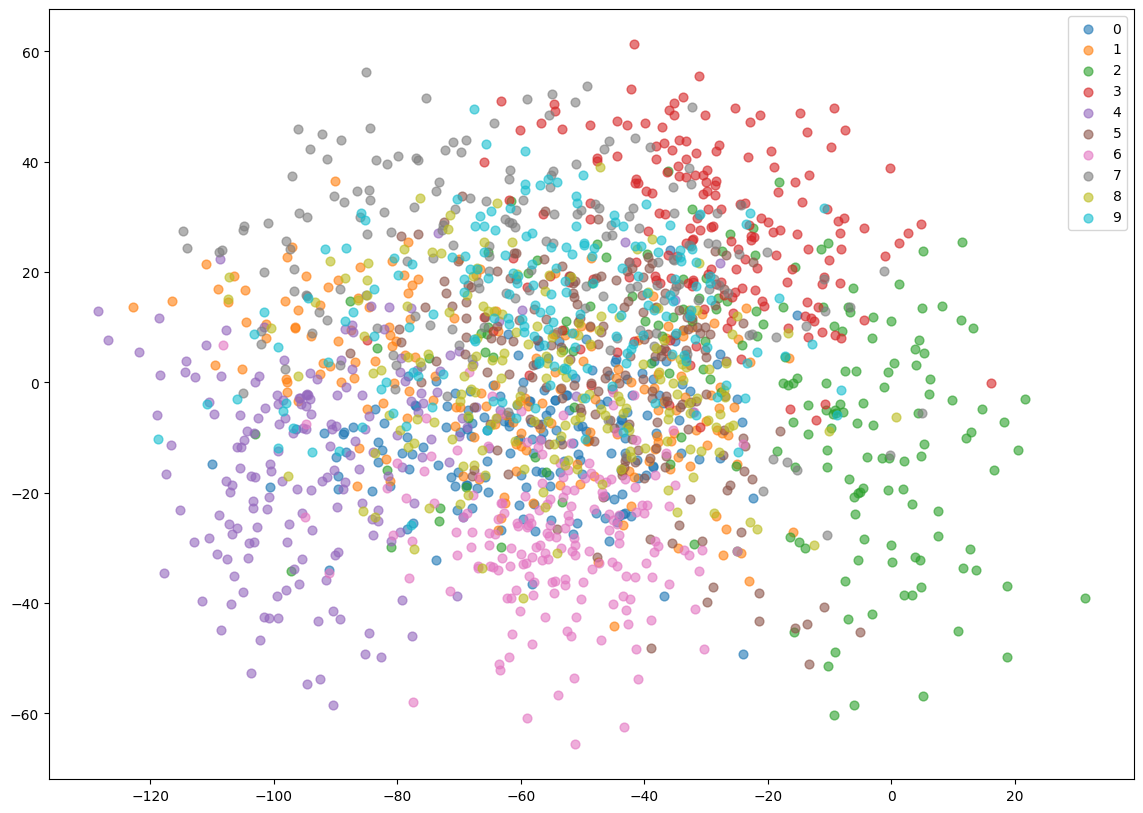

In [24]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
from sklearn.random_projection import GaussianRandomProjection
rng = np.random.RandomState(42)
dim = 2
transformer = GaussianRandomProjection(n_components = dim, random_state=rng)

data_grp =transformer.fit_transform(digits.data)

U_grp, S_grp, VT_grp = svd(data_grp, full_matrices=False)

US_grp = np.dot(U_grp, np.diag(S_grp))

X_grp = [[] for i in range(10)]
Y_grp = [[] for i in range(10)]
# X[i][j] - X координата j точки равной цифре i
# Y[i][j] - Y координата j точки равной цифре i
for i in range(US_grp.shape[0]):
    X_grp[digits.target[i]].append(US_grp[i, 0])
    Y_grp[digits.target[i]].append(US_grp[i, 1])


plt.figure(figsize=(14, 10))
for i in range(10):
    plt.scatter(X_grp[i], Y_grp[i],s=40,  label=str(i), alpha=0.6)
    
plt.legend()

Здесь тоже понижение размерности до 2, но тут ничего существенного увидеть нельзя, да, данные кое-как кучкуются , но это не так заметно как с SVD, можно запустить несколько раз (меняя rng) и увидеть, что происходит примерно одно и тоже - случайные и сильно разбросанные кучки элементов
SVD тут выигрывает, если возьмем какую-то точку рядом с той, значениие которой мы знаем, в случае SVD вероятность то , что их значения совпадут больше  ⇒
⇒
  (наверное это так) лучше обучится модель
Как и в примере с SVD, посмотрим как этот метод групирует 3 и 4

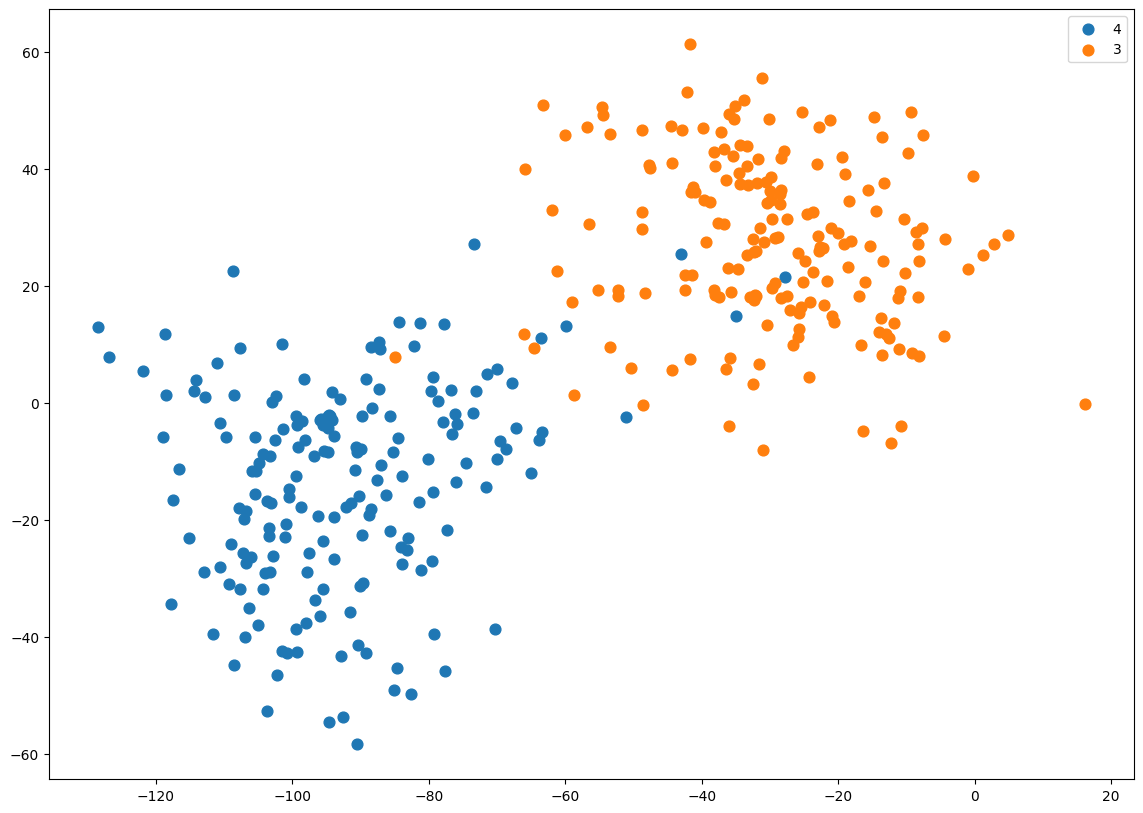

In [25]:
plt.figure(figsize=(14, 10))
plt.scatter(X_grp[4], Y_grp[4],s = 60,  label=str(4))
plt.scatter(X_grp[3], Y_grp[3],s = 60, label=str(3))

    
plt.legend()

Все еще не SVD

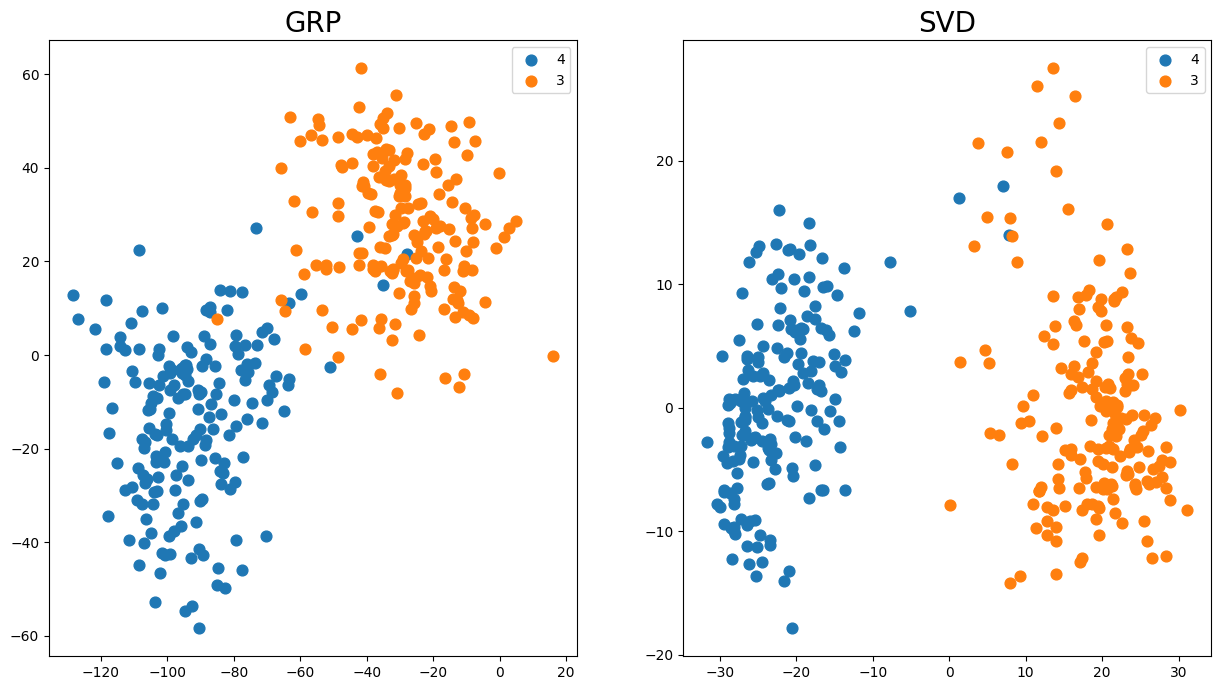

In [26]:
fig, ax = plt.subplots(1, 2, figsize=(15, 8))

ax[0].set_title('GRP', size = 20)
ax[0].scatter(X_grp[4], Y_grp[4],s = 60,  label=str(4))
ax[0].scatter(X_grp[3], Y_grp[3],s = 60, label=str(3))
ax[0].legend()

ax[1].set_title('SVD', size = 20)
ax[1].scatter(X[4], Y[4],s = 60,  label=str(4))
ax[1].scatter(X[3], Y[3],s = 60, label=str(3))
ax[1].legend()

### Задание 3. Когда SVD не сработает

**Disclaimer**

Цель этого задания — познакомить Вас не только с геометрическим смыслом сингулярного разложения, но и перекинуть очередной мостик между линейной алгеброй и анализом данных. К сожалению, на том берегу Вас встретят разные пока неизведанные понятия; мы постараемся по возможности дать какие-то определения, но, конечно, нет никакой возможности изложить на этих страницах полный курс теории вероятностей. Поэтому какие-то вещи останутся недосказанными или необоснованными; если Вам будет интересно, не стесняйтесь читать соответствующую литературу или хотя бы Википедию, а если нет, то мы надеемся, что хотя бы наглядное представление у Вас сформируется. В любом случае, нам хотелось бы, чтобы воспоминания об этом всколыхнулись в ваших головах, когда Вы будете это всё изучать в курсе по теории вероятностей.

Но начнём мы с того, что обсудим ситуацию, в которой SVD работает лучше всего: а именно, со случая, когда данные распределены нормально.

**Что такое плотность вероятности**

В дальнейшем Вам достаточно часто придётся сталкиваться со *случайными величинами*. Мы не будем сейчас пытаться строго определить, что это такое (для этого у вас будет целый курс по теории вероятностей), а остановимся только на одном его аспекте.

Если случайная величина $X$ принимает лишь конечное (или счётное) число значений $x_1,x_2,\ldots$, то чтобы задать её, достаточно описать, с какой вероятностью $X$ равна $x_i$: 

$$p_i = P(X = x_i)$$

таким образом, чтобы $\sum_ip_i = 1$. Если же $X$ принимает значения на каком-либо отрезке или на всей числовой прямой, то так уже не получится: в этом случае вероятность того, что $X$ равна какому-то конкретному $x_0$, обычно равна нулю. Как правило, заменой вероятностей $p_i$ служит *функция плотности распределения* $p(x)$. Смысл её таков:

$$P(\alpha\leqslant X\leqslant\beta) = \int\limits_{\alpha}^{\beta}p(x)dx$$

(в левой части стоит вероятность того, что значение $X$ лежит на отрезке $[\alpha,\beta]$).

Таким образом, функция $p(x)$ действительно играет роль "плотности": вероятность попасть в отрезок одной и той же длины тем выше, чем больше значения $p(x)$ на нём.

**Нормальное распределение**

Одним из самых важных примеров непрерывных распределений является *нормальное распределение*. Его плотность имеет вид

$$p(x) = \frac1{\sqrt{2\pi\sigma^2}}e^{-\frac{(x - a)^2}{2\sigma^2}}$$

У него есть два параметра:

- $a$ - *математическое ожидание*, имеющее смысл среднего значения и для нормального распределения совпадающее с центром симметрии распределения;
- $\sigma^2$ - *дисперсия*: чем она меньше, тем в большей степени распределение сконцентрировано подле своего математического ожидания

Нормальное распределение с параметрами $a$ и $\sigma^2$ можно кратко обозначать $\mathcal{N}(a, \sigma^2)$.

Чтобы проиллюстрировать это, мы сгененерируем много точек из распределений $\mathcal{N}(2, 0.25)$, $\mathcal{N}(0, 1)$ и $\mathcal{N}(0, 4)$ и по ним в каждом из этих случаев построим аппроксимацию функции плотности распределения. Обратите внимание, что параметр $a$ в `numpy` называется `loc`, $\sigma$ (без квадрата!) — `scale`

In [30]:
import numpy as np
from scipy.interpolate import UnivariateSpline
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

<ipython-input-31-56259113fdad>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(s, hist=False, kde=True,
<ipython-input-31-56259113fdad>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(s, hist=False, kde=True,
<ipython-input-31-56259113fdad>:14: UserWarning: 

`distplot` is a

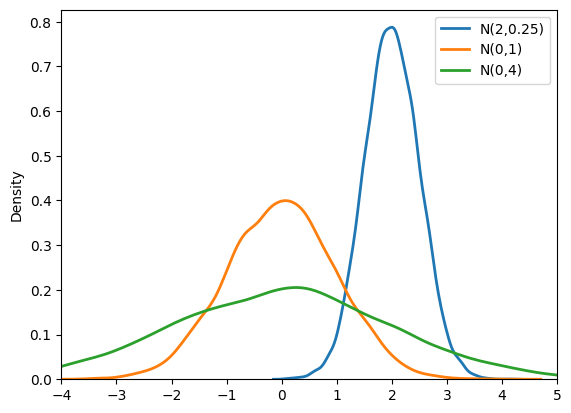

In [31]:
N = 10000
plt.xlim([-4,5])
s = np.random.normal(loc=2, scale=0.5, size=N)   # generate your data sample with N elements
sns.distplot(s, hist=False, kde=True, 
             bins=50,
             kde_kws={'linewidth': 2}, label='N(2,0.25)')

s = np.random.normal(loc=0, scale=1, size=N)   # generate your data sample with N elements
sns.distplot(s, hist=False, kde=True, 
             bins=50,
             kde_kws={'linewidth': 2}, label='N(0,1)')

s = np.random.normal(loc=0, scale=2, size=N)   # generate your data sample with N elements
sns.distplot(s, hist=False, kde=True, 
             bins=50,# color = 'darkblue',
             kde_kws={'linewidth': 2}, label='N(0,4)')

plt.legend()
plt.show()

**Функция плотности распределения в многомерном случае**

Если значения случайной величины $X$ — это многомерные векторы, функция плотности сохраняет примерно тот же смысл: если $\Omega\subseteq\mathbb{R}^n$, то

$$P(X\in\Omega) = \int\limits_{\Omega}p(x)dx$$

**Многомерное нормальное распределение**

Многомерное нормальное распределение определяется также двумя параметрами: *вектором средних* $a$ и положительно определённой *ковариационной матрицей* $\Sigma$; оно имеет плотность

$$p(x) = \frac1{(2\pi)^{n/2}|\Sigma|^{1/2}}e^{-\frac12(x - a)^T\Sigma^{-1}(x - a)}$$

где, напомним, $x$ — вектор из $\mathbb{R}^n$. Компоненты вектора $a$ — это математические ожидания отдельных координат $X$, а на диагонали матрицы $\Sigma$ стоят их *дисперсии* (настоящие, без кавычек). Вне диагонали стоят *ковариации* компонент $X$ (пока вам достаточно понимать, что если они равны нулю, то эти компоненты независимы$^1$).

---
$^1$ Точнее сказать, некоррелированны, однако для компонент многомерного нормального распределения независимость и некоррелированность равносильны (на самом деле редкое и удачное свойство!).

**Несколько фактов**

* Под (n-1)-мерным эллипсоидом будем понимать гиперповерхность в $\mathbb{R}^n$, такую что в некоторой прямоугольной декартовой системе координат её уравнение принимает вид $\sum_{i=1}^n \frac{x_i^2}{r_i^2} = 1$. Поверхности уровня $p(x) = c$ — это эллипсоиды.

*  Пользуясь теоремой о приведении квадратичной формы к главным осям, можно показать, что функция плотности многомерного нормального распределения представляется в виде произведения одномерных нормальных плотностей при переходе в новую систему координат. 
$$p(x)=\frac1{(2\pi)^{n/2}|\Sigma|^{1/2}}e^{-\frac12(x - a)^T\Sigma^{-1}(x - a)}\:\underset{\text{новая система координат}}{\to}\: p(x)=p(x_1)\cdot ...\cdot p(x_n)$$

    В частности, это означает, что с помощью замены координат можно добиться того, чтобы отдельные компоненты были независимы (то есть матрица ковариации $\Sigma$ диагональна).

А мы тем временем продемонстрируем это на конкретном примере, сгенерировав много точек из двумерного нормального распределения с вектором средних $(-1,3)$ и ковариационной матрицей

$$\begin{pmatrix}
1 & \frac32\\
\frac32 & 5
\end{pmatrix}$$

и нарисовав приближённо линии уровня функции плотности.

<ipython-input-34-977a259a630c>:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=False`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(s, shade=False, color='g')


<Axes: ylabel='Density'>

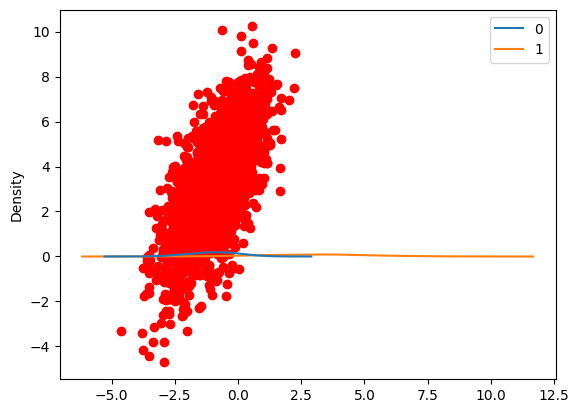

In [34]:
import seaborn as sns
import numpy as np

N = 2000
s = np.random.multivariate_normal(mean=np.array([-1,3]), cov=np.array([[1,1.5],[1.5,5]]), size=N)
plt.scatter(s[:,0], s[:,1], color='red')
sns.kdeplot(s, shade=False, color='g')

Как видите, линии уровня весьма напоминают эллипсы (только напоминают, потому что точек у нас всё-таки конечное число).

**1. [0 баллов]** Сгенерируйте выборку из 1000 точек $x_1,\ldots,x_{1000}$ из нормального распределения с вектором средних $a = (0,0)$ и ковариационной матрицей

$$\Sigma = \begin{pmatrix}
1 & -2\\
-2 & 5
\end{pmatrix}.$$

In [35]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
n = 1000
a = np.array([0, 0])
Sigma = np.array([[1, -2],[-2, 5]])
X = np.random.multivariate_normal(mean=a, cov=Sigma, size=n) 

**2. [0.25 балла]** Сделайте SVD-разложение $X = U\Sigma V^T$. Нарисуйте на плоскости все точки $x_i$ и направления новых признаков. Убедитесь, что направления новых признаков примерно совпадают с направлениями полуосей эллипса, образованного точками.

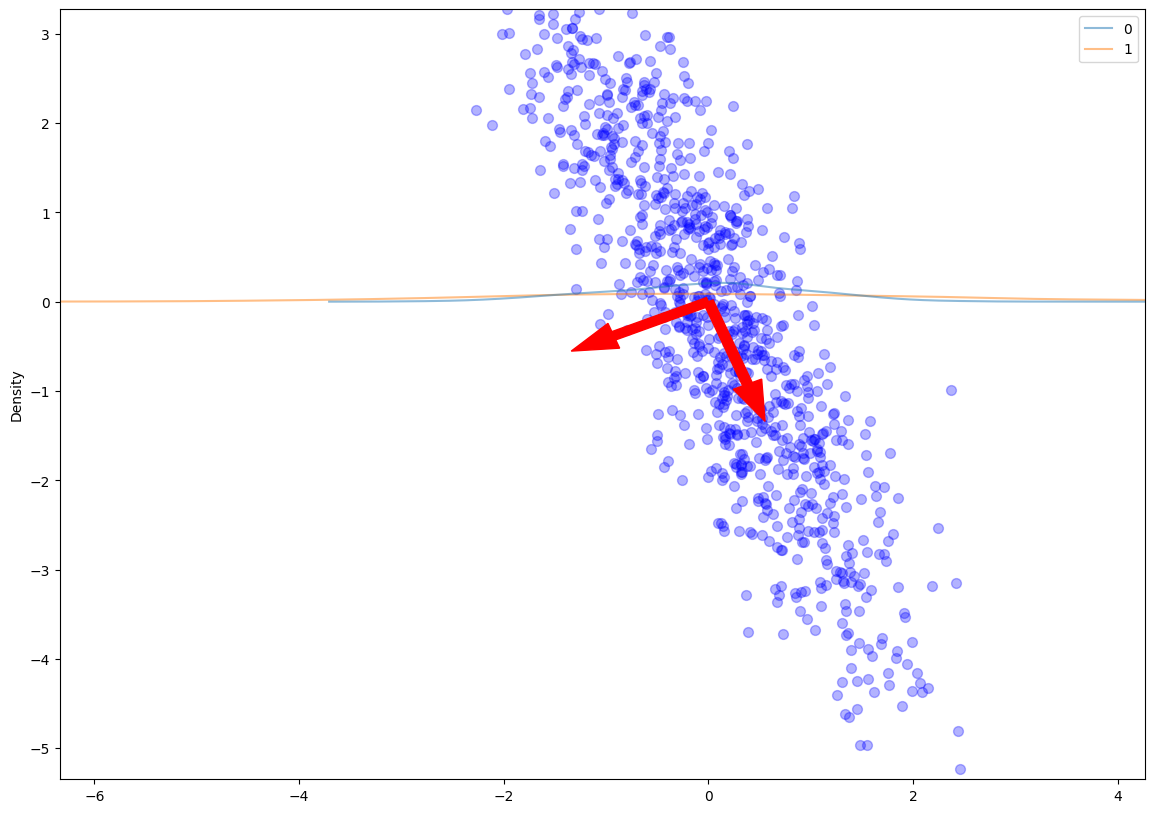

In [38]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
U, S, VT = svd(X, full_matrices = False)

plt.figure(figsize=(14, 10))
plt.scatter(X[:,0], X[:,1], color='b', s=50, alpha=0.3)
plt.arrow(0, 0, VT[0, 0], VT[0, 1],color = 'red',  width = 0.1)
plt.arrow(0, 0, VT[1, 0], VT[1, 1],color = 'red',  width = 0.1)
sns.kdeplot(X, fill=False, color='g', alpha = 0.5)
plt.margins(-0.2, -0.2)

**3. [0.5 балла]** Приведите к главным осям матрицу ковариации (это нужно сделать без привлечения `Python`) и убедитесь, что направления этих осей тоже примерно совпадают с наблюдаемыми направлениями полуосей эллипсоида.

╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
Матрица ковариации:
$\Sigma = \begin{pmatrix}
1 & -2\\
-2 & 5
\end{pmatrix}$

Сначала вычислим собственные значения.

$$ det(\Sigma - \lambda E) = det
\begin{pmatrix}
1 - \lambda & -2\\
-2 & 5 - \lambda
\end{pmatrix}
= \lambda^2 - 6\lambda + 1 \textrm{;} $$

$$ \lambda_1 = 3 - 2\sqrt{2}, \lambda_2 = 3 + 2\sqrt{2} $$

$\Rightarrow$ приведенная к главным осям матрица ковариации будет иметь вид:

$$ \Sigma' = \left(
\begin{matrix}
3 - 2\sqrt{2} & 0 \\
0 & 3 + 2\sqrt{2}
\end{matrix} \right) $$

Теперь найдем собственные векторы.

$ \lambda_1 = 3 - 2\sqrt{2}: $

$$\Sigma - \lambda_1 E =
\begin{pmatrix}
1 - 3 + 2\sqrt{2} & -2\\
-2 & 5 - 3 + 2\sqrt{2}
\end{pmatrix} \rightarrow
\begin{pmatrix}
-2 + 2\sqrt{2} & -2\\
-2 & 2 + 2\sqrt{2}
\end{pmatrix} \rightarrow
\begin{pmatrix}
1 & \sqrt{2} - 1\\
0 & 0
\end{pmatrix} \Rightarrow
v_1 = \left(
\begin{matrix}
1 - \sqrt{2} \\
1
\end{matrix} \right) $$

$ \lambda_2 = 3 + 2\sqrt{2}:$

$$\Sigma - \lambda_2 E =
\begin{pmatrix}
1 - 3 - 2\sqrt{2} & -2\\
-2 & 5 - 3  -2\sqrt{2}
\end{pmatrix} \rightarrow
\begin{pmatrix}
-2 - 2\sqrt{2} & -2\\
-2 & 2 - 2\sqrt{2}
\end{pmatrix} \rightarrow
\begin{pmatrix}
1 & -\sqrt{2} - 1\\
0 & 0
\end{pmatrix} \Rightarrow
v_2 = \left(
\begin{matrix}
1 + \sqrt{2} \\
1
\end{matrix} \right) $$

$v_1$ и $v_2$ заведомо ортогональны. Ортонормируем их.

$$ v'_1 = \frac{v_1}{|v_1|} = \left(
\begin{matrix}
\frac{1 - \sqrt{2}}{\sqrt{4 - 2\sqrt{2}}} \\
\frac{1}{\sqrt{4 - 2\sqrt{2}}}
\end{matrix} \right)$$

$$ v'_2 = \frac{v_2}{|v_2|} = \left(
\begin{matrix}
\frac{1 + \sqrt{2}}{\sqrt{4 + 2\sqrt{2}}} \\
\frac{1}{\sqrt{4 + 2\sqrt{2}}}
\end{matrix} \right)$$

$v'_1$ и $v'_2$ будут соответствовать направлениям главных осей.

Как Вы могли убедиться, SVD хорошо справляется со своей работой, когда данные распределены нормально, а в других случаях может давать совсем не такие информативные (или даже не адекватные) результаты.

**4. [0.25 балла]** Сгенерируйте двумерную выборку, представляющую собой два расположенных рядом (см. пример ниже) длинных и узких не пересекающихся эллипса с центрами в точках $(-1,0)$ и $(1,0)$ и с параллельными направлениями полуосей. Иными словами, постарайтесь как можно точнее воспроизвести картинку ниже. 

In [39]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
N = 1000

covmatr = np.array([[1, 4], [2, 7]])
A = np.random.multivariate_normal(mean=np.array([-1, 0]), cov=covmatr, size=N)
B = np.random.multivariate_normal(mean=np.array([1, 0]), cov=covmatr, size=N)
X = np.concatenate((A, B))
# plt.figure(figsize=(14, 10))
# plt.scatter(X[:,0], X[:,1], color='#5eb5b2', alpha=0.4)
# plt.scatter(B[:,0], B[:,1], color='r', alpha=0.4)

# sns.kdeplot(X, shade=False, color='g')

<ipython-input-39-bd6607fa24d1>:5: RuntimeWarning: covariance is not positive-semidefinite.
  A = np.random.multivariate_normal(mean=np.array([-1, 0]), cov=covmatr, size=N)
<ipython-input-39-bd6607fa24d1>:6: RuntimeWarning: covariance is not positive-semidefinite.
  B = np.random.multivariate_normal(mean=np.array([1, 0]), cov=covmatr, size=N)


**5. [0.1 балла]** Сделайте SVD и нарисуйте направления новых признаков.

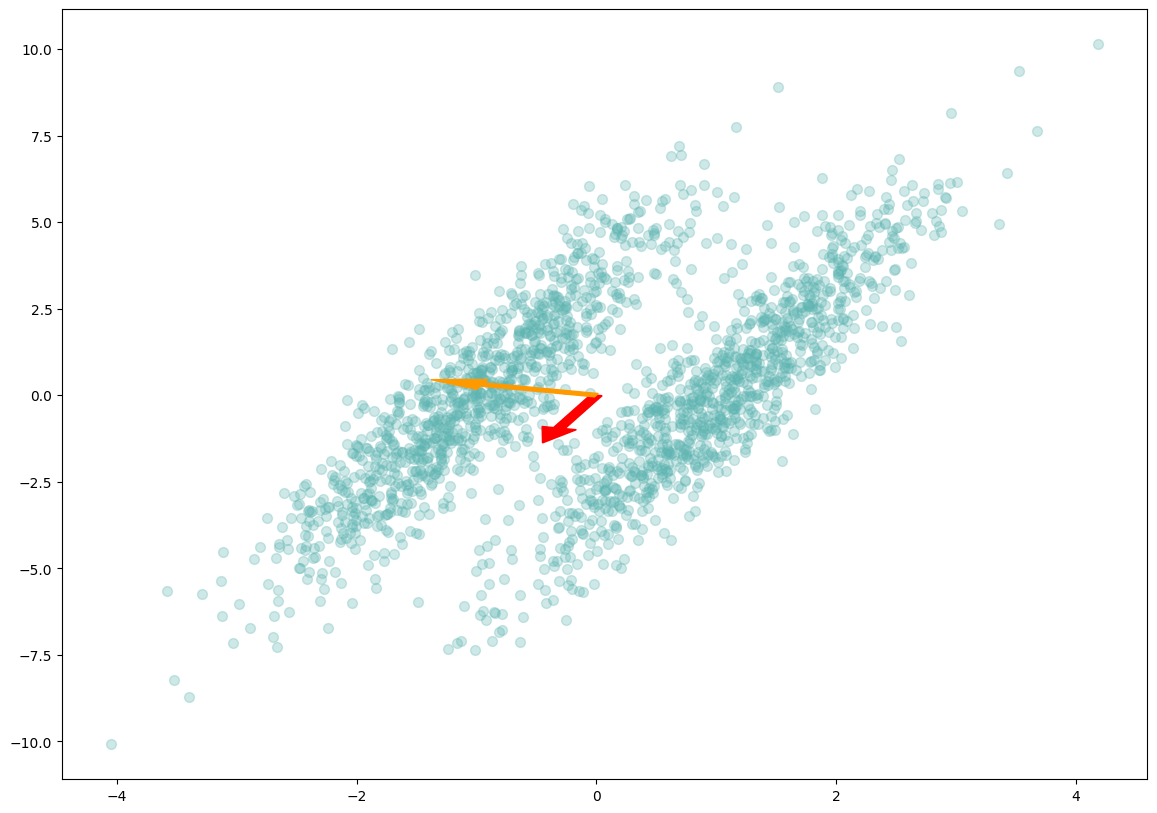

In [40]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
U, S, VT = svd(X, full_matrices = False)

plt.figure(figsize=(14, 10))
plt.scatter(X[:,0], X[:,1], color='#5eb5b2', s=50, alpha=0.3)
plt.arrow(0, 0, VT[0, 0], VT[0, 1],color = 'r',  width = 0.1)
plt.arrow(0, 0, VT[1, 0], VT[1, 1],color = '#ff9900',  width = 0.1)

Если бы мы решали задачу анализа данных, то скорее всего нас интересовал признак, который бы разделял два кластера (в данном случае два эллипса), то есть такая функция $f(x)$, для которой
$$f(x) < c,\ \mbox{если объект $x$ из первого класса}$$
$$f(x) > c,\ \mbox{если объект $x$ из второго класса}$$
для некоторого числа $c$.

**6. [0.25 балла]** Помогает ли какой-нибудь из двух предоставленных SVD признаков обнаружить эту структуру? Обязательно поясните свой ответ.

╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ  Нет, не помогают, так как пока одна из прямых разделяет эллипсы, другая пересекает, но только один. 

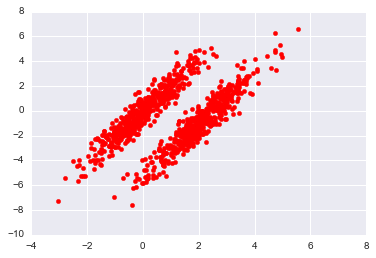

In [ ]:
# Just keep this image as a sample

**7. [0 баллов]** Сгенерируйте выборку из 1000 точек $x_1,\ldots,x_{1000}$ из нормального распределения с вектором средних $a = (1,1)$ и ковариационной матрицей

$$\Sigma = \begin{pmatrix}
1 & 0\\
0 & 4
\end{pmatrix}.$$

In [42]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
X = np.random.multivariate_normal(mean=np.array([1, 1]), cov=np.array([[1,0],[0,4]]), size=1000)

**8. [0.2 балла]** Очевидно, что "интересными" для этого датасета направлениями будут направления полуосей эллипса-облака точек. Глядя только на матрицу $\Sigma$, определите, что это будут за направления? Поясните свой ответ.

╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
Т.к. ковариации (не диагональные элементы) = 0 $\Rightarrow$ элементы независимы и новые элементы будут получаться вытягиванием(сужением) $\Rightarrow$ направления будут паралельны осям координат (столбцам)


**9. [0.1 балла]** Сделайте SVD-разложение $X = U\Sigma V^T$. Нарисуйте все точки $x_i$ на плоскости и направления новых признаков.

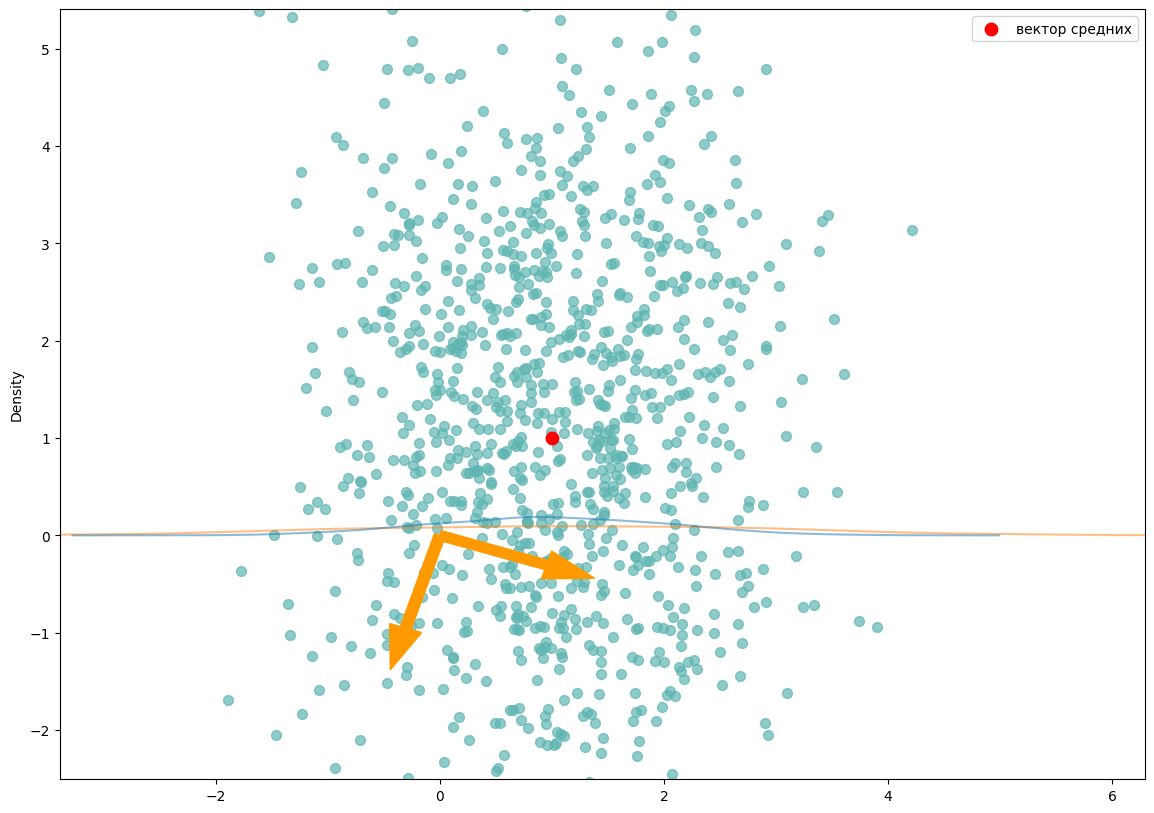

In [44]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
U, S, VT = svd(X, full_matrices = False)

plt.figure(figsize=(14, 10))

plt.scatter(X[:,0], X[:,1], color='#5eb5b2', s=50, alpha=0.7)

plt.scatter(1, 1, color='r', s=80, label='вектор средних')

plt.arrow(0, 0, VT[0, 0], VT[0, 1],color = '#ff9900',  width = 0.1)
plt.arrow(0, 0, VT[1, 0], VT[1, 1],color = '#ff9900',  width = 0.1)

sns.kdeplot(X, fill=False, color='g', alpha = 0.5)


plt.legend()

plt.margins(-0.2, -0.2)

**10. [0.4 балла]** Сделайте вывод: в чём проблема и как можно её исправить?

╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
Вывод: чтобы графики показывали нужные данные, необходимо чтобы облако точек было изначально центрировано в нуле. это достигается тем, что мы изначально из признака вычитаем средние значения(это понятно из задания выше). 